In [1]:
import pandas as pd
from tqdm import tqdm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [2]:
# Load the updated dataset
file_path = 'updated_dataset_no_missing.csv'
data = pd.read_csv(file_path)

In [3]:
# Initialize Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

In [4]:
# Function to perform sentiment analysis based on aspects
def analyze_sentiment(row):
    aspect_sentiments = []
    if pd.notnull(row['Extracted_Aspects']):
        aspects = row['Extracted_Aspects'].split(';')  # Assuming aspects are separated by ';'
        for aspect in aspects:
            sentiment_score = sid.polarity_scores(aspect)['compound']
            if sentiment_score >= 0.05:
                aspect_sentiments.append('positive')
            elif sentiment_score <= -0.05:
                aspect_sentiments.append('negative')
            else:
                aspect_sentiments.append('neutral')
    return aspect_sentiments

In [5]:
# Apply sentiment analysis function to each row
tqdm.pandas(desc="Performing Sentiment Analysis")
data['Label'] = data.progress_apply(analyze_sentiment, axis=1)

Performing Sentiment Analysis: 100%|██████████| 27816/27816 [00:01<00:00, 17574.40it/s]


In [6]:
# Compare generated label with existing labels
def compare_labels(row):
    generated_label = row['Label']  # Assuming the sentiment column is named 'Label'
    existing_label = row['Label (Based on Rating)']
    return generated_label == existing_label

In [7]:
# Apply comparison function to each row
data['Label_Comparison'] = data.progress_apply(compare_labels, axis=1)

Performing Sentiment Analysis: 100%|██████████| 27816/27816 [00:00<00:00, 131779.08it/s]


In [8]:
# Function to categorize aspect sentiments into 'positive', 'negative', 'neutral'
def categorize_sentiments(row):
    aspect_sentiments = row['Label']
    positive = aspect_sentiments.count('positive')
    negative = aspect_sentiments.count('negative')
    neutral = aspect_sentiments.count('neutral')
    if positive > negative and positive > neutral:
        return 'positive'
    elif negative > positive and negative > neutral:
        return 'negative'
    else:
        return 'neutral'

In [9]:
# Apply sentiment categorization function to each row
data['Label'] = data.progress_apply(categorize_sentiments, axis=1)

Performing Sentiment Analysis: 100%|██████████| 27816/27816 [00:00<00:00, 172832.11it/s]


In [10]:
# Calculate comparison counts
comparison_counts = data['Label_Comparison'].value_counts()

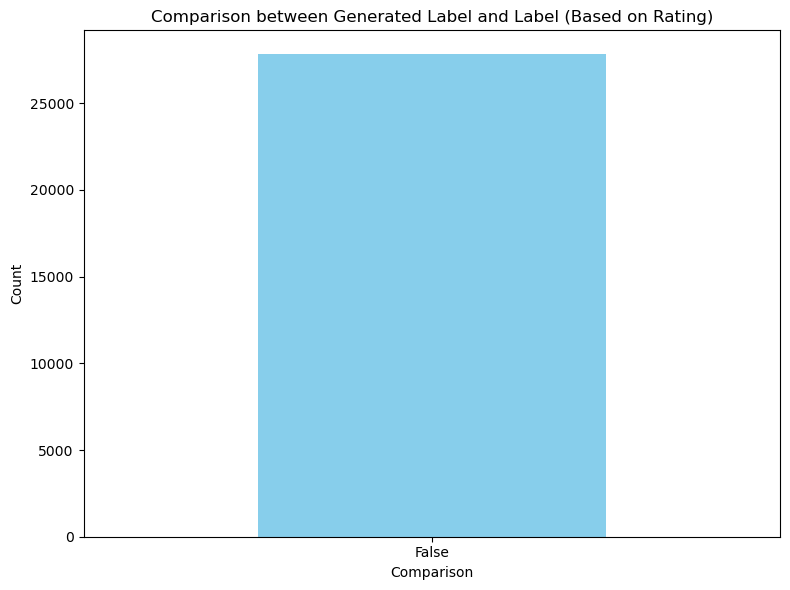

In [11]:
# Plotting the comparison
plt.figure(figsize=(8, 6))
comparison_counts.plot(kind='bar', color='skyblue')
plt.title('Comparison between Generated Label and Label (Based on Rating)')
plt.xlabel('Comparison')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

In [12]:
# Save the updated dataset to a new CSV file
output_file_path = 'dataset_with_sentiment.csv'
data.to_csv(output_file_path, index=False)